In [1]:
#importing some useful packages
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import pandas as pd

# Importing and Exploring images

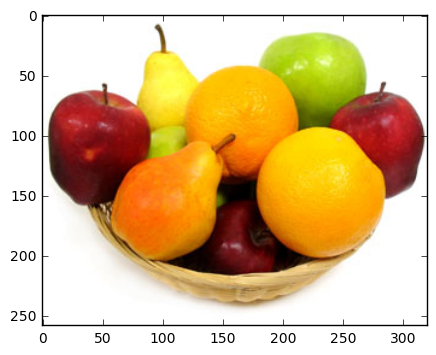

In [2]:
# lets look at an example image.
fruits = mpimg.imread('fruits.png')
plt.imshow(fruits)

How is this image stored in python? lets take a look at it's type.

In [3]:
print('The image is stored as a {0}'.format(type(fruits)))

The image is stored as a <class 'numpy.ndarray'>


It's a numpy array! Lets Take a look at it's shape.

In [4]:
print('The image a numpy array of shape {0}'.format(fruits.shape))

The image a numpy array of shape (258, 320, 3)


A 3 dimensional array? But the original image is only 2 dimensional. Hmm, the first two dimensions make sense, looks like the first dimension is the y-axis and the 2nd is the x-axis and the image is indexed from the top-left corner(observe in the plot above how `(0,0)` is the top-left point, that's the origin, I wonder why though? [ans](http://gamedev.stackexchange.com/a/83571)) but what is the third dimension?

# Channels and Layers

Lets take a look at the third dimension and see what it contains.

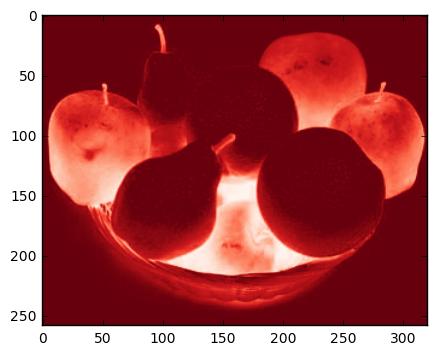

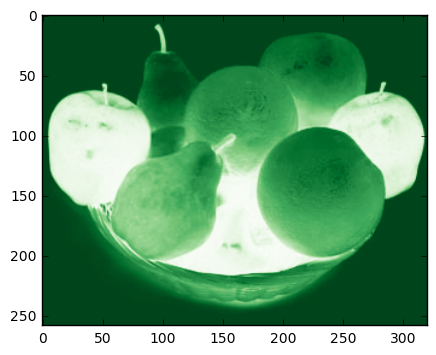

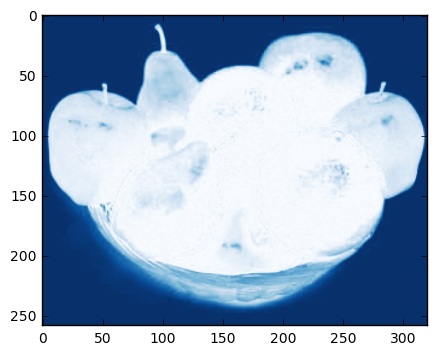

In [5]:
for i,c in zip(range(3),['Reds','Greens','Blues']):
    plt.imshow(fruits[:,:,i], cmap=c)
    plt.show()

Looks like the third dimension corresponds to each color in the RGB spectrum. We call these the channels of the image. Think of the channels as layers in an image. Each value in the 3d array corresponds to pixel intensities.

For instance, if a pixel is represented as `[r,g,b]` intensities
+ `[1,0,0]` corresponds to a `red` pixel,
+ `[0,1,0]` corresponds to a `green` pixel and 
+ `[0,0,1]` corresponds to a `blue` pixel.

So, How does all this look in the image? Numpy arrays are comfusing to read, lets look at a dataframe, more tabular.

In [6]:
pd_fruits = pd.DataFrame([list(l) for l in fruits])
pd_fruits.head()

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]",...,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]"
1,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]",...,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]"
2,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]",...,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]"
3,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]",...,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]"
4,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]",...,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]"


We previously saw how each channel can be view separately. Now let us try and create a 3 channel image with just one color. For this, we must ensure that the channels other than the color of interest must be all `zero` i.e. empty. We achieve this using [`np.dstack`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dstack.html#numpy-dstack) to stack empty channels together to make a 3 channel image.

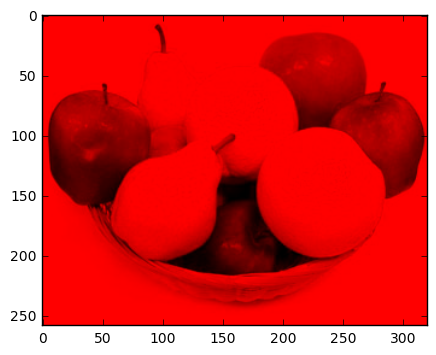

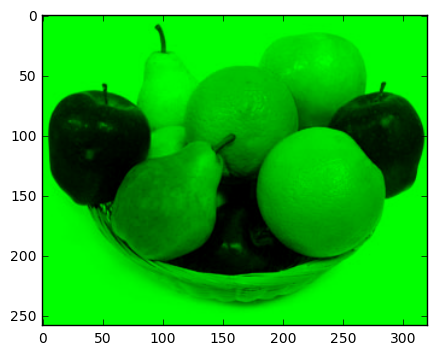

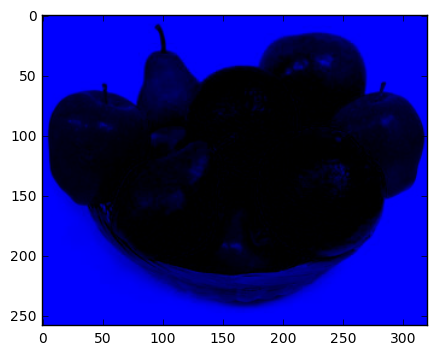

In [7]:
red_fruits = np.dstack([fruits[:,:,0],np.dstack([np.zeros_like(fruits[:,:,0])]*2)])
plt.imshow(red_fruits);
plt.show()
green_fruits = np.dstack([np.zeros_like(fruits[:,:,1]),fruits[:,:,1], np.zeros_like(fruits[:,:,1])])
plt.imshow(green_fruits);
plt.show()
blue_fruits = np.dstack([np.dstack([np.zeros_like(fruits[:,:,2])]*2),fruits[:,:,2]])
plt.imshow(blue_fruits);
plt.show()

# Grayscale

Lets see how we can grayscale the image. A grayscale image is simply a single channel image. The vaules are not array of intensities but simply intensity values of pixels. `0` intensity refers to `Black` and `1` refers to `White`. We can average the values of the channels to get a mapping from the 3 channels to a single channel. 

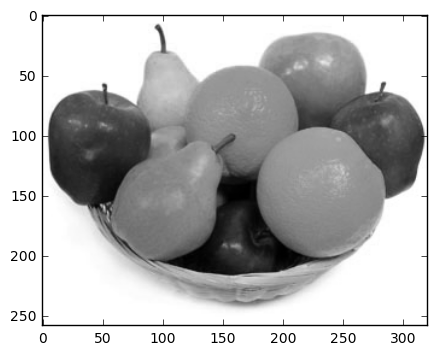

In [8]:
avg_fruit = fruits.mean(axis=2)
plt.imshow(avg_fruit,cmap='gray')

Lets see how our image compares to an image coverted by the `cvtColor` function in openCv.

The image a numpy array of shape (258, 320)


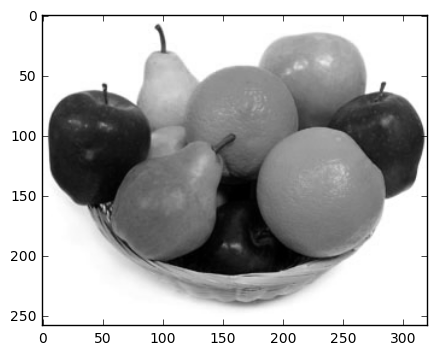

In [9]:
fruits_gray = cv2.cvtColor(fruits, cv2.COLOR_BGR2GRAY)
print('The image a numpy array of shape {0}'.format(fruits_gray.shape))
plt.imshow(fruits_gray, cmap='gray')

# Slicing and Cropping
So, these images are numpy arrays. We should be able to perform common array opertions such as indexing and slicing

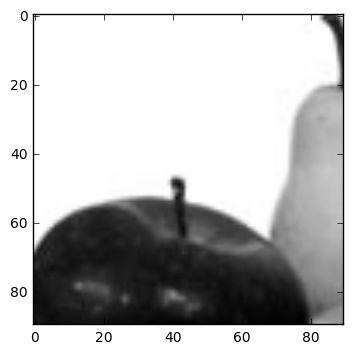

In [10]:
cropped_fruits = fruits_gray[10:100:,10:100]
plt.imshow(cropped_fruits, cmap='gray')

Seem like this is how images are cropped.

# Image Math

Alright, lets see if some basic mathematical opertions`('+' , '-' , '/' and '*' )` work with image arrays. For this we need another image.  

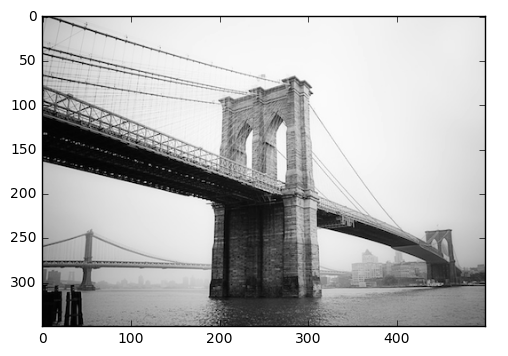

In [11]:
bridge = mpimg.imread('brooklyn_bridge.png')
plt.imshow(bridge, cmap='gray')

Before we add the two images lets look at their shapes, remember math works only on arrays with same the dimensions.

In [12]:
print(fruits_gray.shape)
print(bridge.shape)

(258, 320)
(350, 500)


Looks like images are of different shapes. Luckily we know how to crop them. The `bridge` image is the bigger one, lets crop it to the size of the `fruits` image.

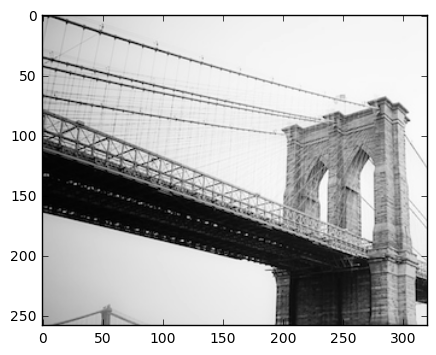

In [13]:
fruits_shape = fruits_gray.shape
cropped_bridge = bridge[:fruits_shape[0], :fruits_shape[1]]
plt.imshow(cropped_bridge, cmap='gray')

In [14]:
math_images = {}
#Addition
math_images['added_image'] = fruits_gray + cropped_bridge

#Subtraction
math_images['sub_fruit_bridge'] = fruits_gray - cropped_bridge
math_images['sub_bridge_fruit'] = cropped_bridge - fruits_gray

# Multipliction
math_images['multi_image'] = cropped_bridge * fruits_gray

# Division (Cautions of division by zero)
math_images['div_fruit_bridge'] = fruits_gray // cropped_bridge
math_images['div_bridge_fruit'] = cropped_bridge // fruits_gray

# Modulo (Cautions of division by zero)
math_images['mod_fruit_bridge'] = fruits_gray % cropped_bridge
math_images['mod_bridge_fruit'] = cropped_bridge % fruits_gray


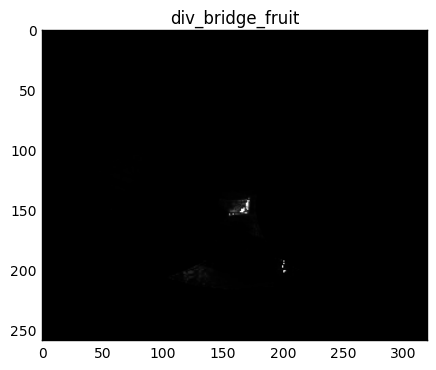

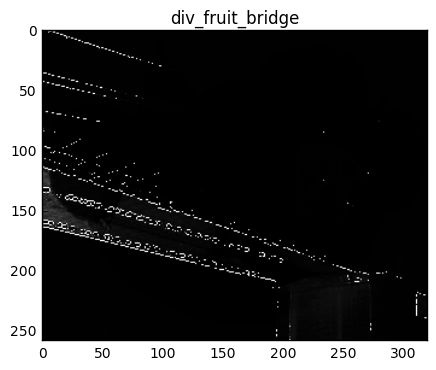

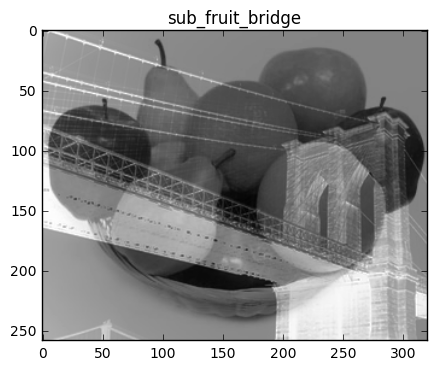

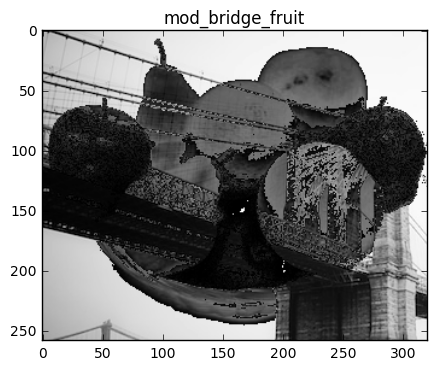

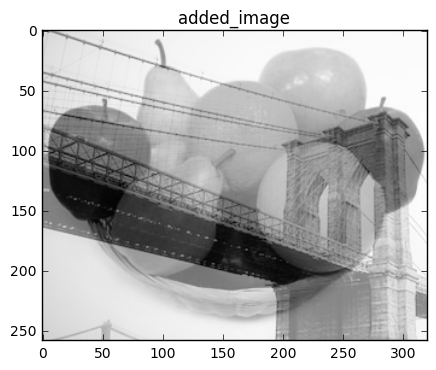

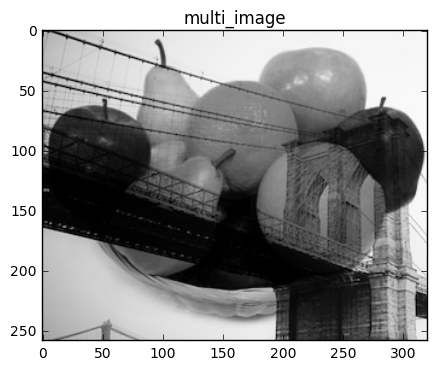

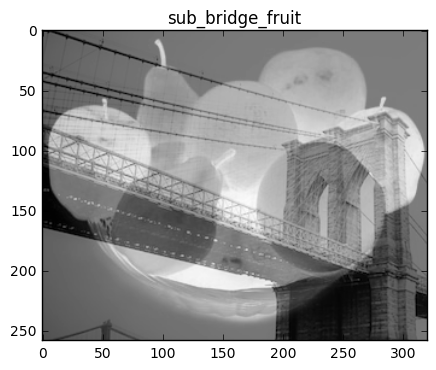

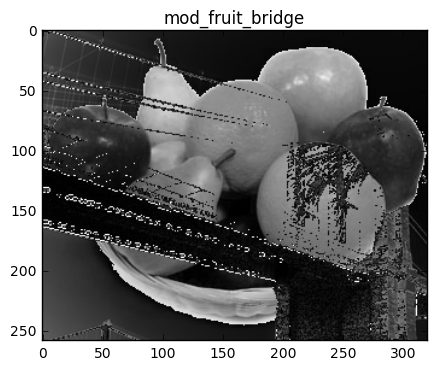

In [15]:
for k,v in math_images.items():
    plt.imshow(v, cmap='gray')
    plt.title(k)
    plt.show()

That was fun. Lets review what we know so far:
- Images are represented as numpy arrays.
- The values in the array are intensities of pixels. 3 channel and each channel contains a color. Thinking of channels as layers helps. There is a Red Layer, a Green Layer and a Blue Layer. Stack them together and we get a color image.
- The image is indexed form the top-left.
- We can slice images. This is similar to cropping an image
- We can perfrom comman mathematical operations on images such as addition, subrtaction, multiplication and division.

# Blending images

Blending two images is different from just plain addition of images. Here we choose the ratios of each image we would like to see in the final resultant image. Play with the `alpha` and `beta` parameters below and see how the resulting image changes.

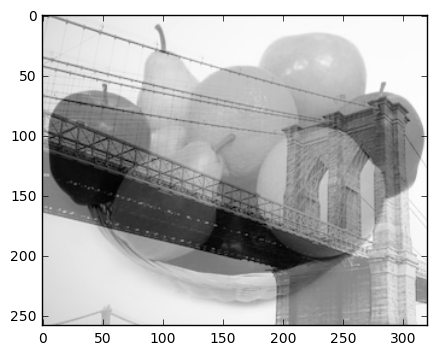

In [16]:
alpha = 0.3
beta = 0.7
blended_image = cv2.addWeighted(fruits_gray,alpha,cropped_bridge,alpha,0)
plt.imshow(blended_image, cmap='gray')

# Blurring Images

This is one of the most used filter. It simply applies a blurr(noise) in the image. The noise maybe choosed from any probability distribution. Here, we look at uniform noise from the Gaussian distribution. The `kernel_size` parameter determines the number of pixels around each pixel to sample the noise from. This should always be an odd number so that the center pixel maybe included

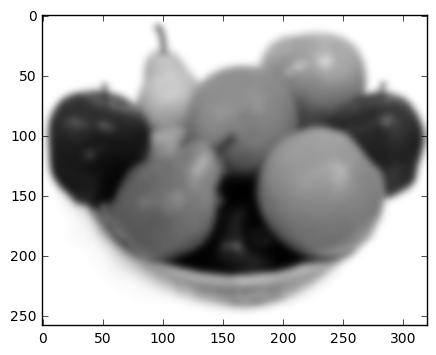

In [17]:
kernel_size = 17
blurred_fruits = cv2.GaussianBlur(fruits_gray, (kernel_size, kernel_size), 0)
plt.imshow(blurred_fruits, cmap='gray')

Lets look at a thin strip in the image and see how the pixel values change as the x values change. We should be able to understand the effect of the gaussian noise better looking at these plots.

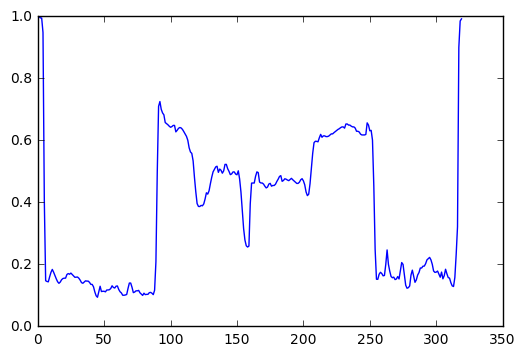

In [18]:
plt.plot(fruits_gray[100, :])
plt.show()

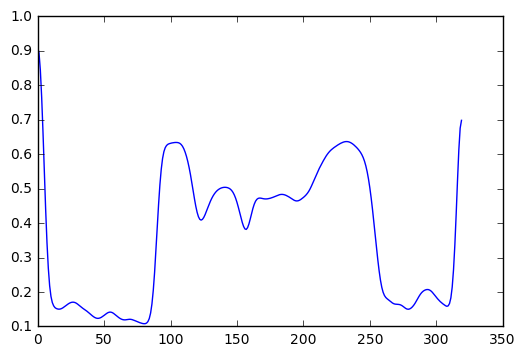

In [19]:
plt.plot(blurred_fruits[100,:])
plt.show()

# Drawing Images

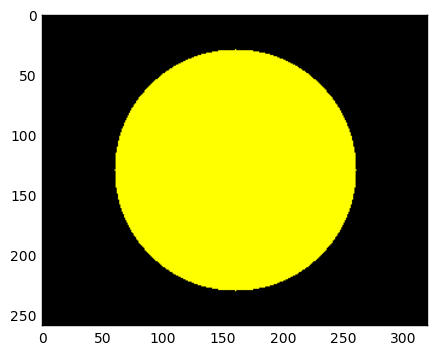

In [20]:
# Create a black image this will be our slate
img = np.zeros_like(fruits, np.uint8)

fruits_shape = np.array(img.shape[:2], dtype=np.int32)

# lets start with a circle
cv2.circle(img,(fruits_shape[1]//2, fruits_shape[0]//2), 100, (255,255,0), -1)

plt.imshow(img)

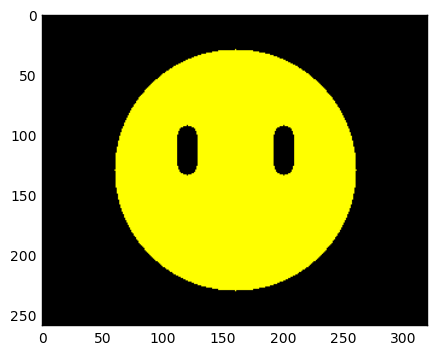

In [21]:
# lets draw a few lines
cv2.line(img,(120,100),(120,125),(0,0,0), 15)
cv2.line(img,(200,100),(200,125),(0,0,0), 15)

plt.imshow(img)

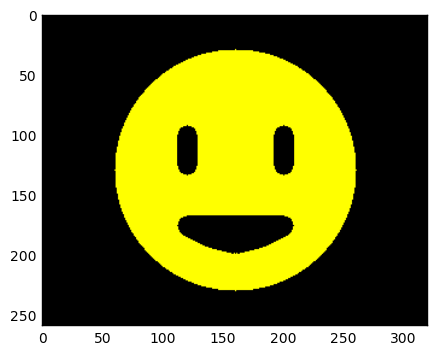

In [22]:
# Lets draw multiple lines 
pts = np.array([[120,175],[140,185],[160,190],[180,185],[200,175]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img, [pts],True,(0,0,0), 15)

plt.imshow(img)

In [23]:
gray_smile = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Masking

Masking an image refers to blocking out portions of the image. This might be a channel a color or a region of the image. Here we play with the bitwise_and to mask an image using another image

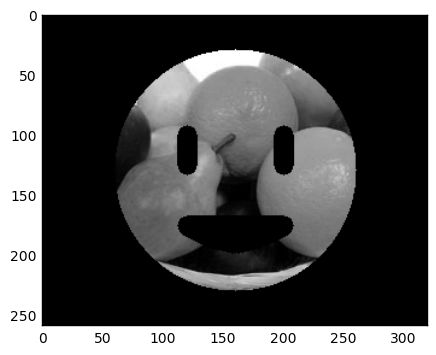

In [24]:
masked_image = cv2.bitwise_and(fruits_gray,fruits_gray,mask=gray_smile)
plt.imshow(masked_image, cmap='gray')